# 3.09 Numerical methods 1 exam - 14:00-16:00 26 April 2016

# Test instructions

* This test contains **5** questions each of which should be answered.
* Write your program in a Python cell just under each question.
* You can write an explanation of your solution as comments in your code.
* In each case your solution program must fulfil all of the instructions. Please check the instructions carefully and double check that your program fulfils all of the given instructions.
* Save your work regularly.
* At the end of the test you should email your IPython notebook document (i.e. this document) to [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman) at <mailto:g.gorman@imperial.ac.uk> **and also** [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott) at
<mailto:m.d.piggott@imperial.ac.uk>  

## Question 1

Given the data points

|  x  |  y  |
|-----|-----|
| 0.1 | 0.3 |
| 0.3 | 0.1 |
| 1.0 | 0.2 |
| 1.4 | 0.3 |
| 2.8 | 0.7 |
| 4.5 | 0.9 |

 1. Calculate the Lagrange polynomial for these points. Plot both the Lagrange polynomial and the raw data points. <sub>[10 marks]</sub>
 2. Fit a $3^{rd}$ order polynomial (cubic function) to fit a curve to the given data points. Plot the resulting polynomial function as well as the raw data points. <sub>[10 marks]</sub>

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


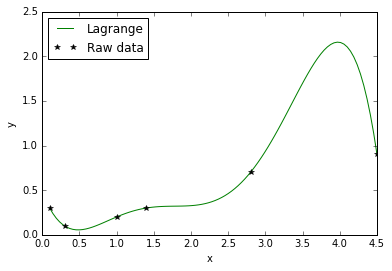

hello world


In [4]:
# Solution 1.1

%pylab inline

import numpy
import pylab
import scipy.interpolate

x=numpy.array([0.1,0.3,1.0,1.4,2.8,4.5])
y=numpy.array([0.3,0.1,0.2,0.3,0.7,0.9])

xx=numpy.linspace(min(x), max(x), 100)

lp=scipy.interpolate.lagrange(x, y)
pylab.plot(xx, lp(xx), 'g', label='Lagrange')
    
# Overlay raw data
pylab.plot(x,y,'k*',label='Raw data')
pylab.xlabel('x')
pylab.ylabel('y')

# Add a legend
pylab.legend(loc='best')

pylab.show()

print "hello world"


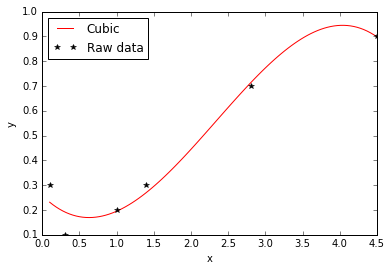

In [5]:
# Solution 1.2

# Cubic
poly_coeffs=numpy.polyfit(x, y, 3)
p3 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p3(xx), 'r', label='Cubic')

# Overlay raw data
pylab.plot(x,y,'k*',label='Raw data')
pylab.xlabel('x')
pylab.ylabel('y')

# Add a legend
pylab.legend(loc='best')

pylab.show()

## Question 2

For this exercise, consider the system of linear equations

\begin{align*}
  2x + -3y + 4z &= 5 \\
  x -  y + 5z &= 0 \\
  -x + 2y + 7z &= -2
\end{align*}

 1. Rewriting the above equation in matrix form, $\pmb{A} \pmb{x} = \pmb{b}$, show that $\pmb{A}$ has an inverse and therefore the above system as a solution. <sub>[5 marks]</sub>
 2. Write a function that takes a matrix $\pmb{A}$ and a vector $\pmb{b}$ and converts it into upper-triangular form. <sub>[5 marks]</sub>
 3. Write a python function that solves for $\pmb{x}$ given $\pmb{A}$ and $\pmb{b}$ as inputs. This python function should call the function you developed in the previous question, 2.2. <sub>[5 marks]</sub>
 4. Use `numpy.dot(linalg.inv(A),b)` to verify your solution. <sub>[5 marks]</sub>

In [6]:
# 2.1
import numpy.linalg

A = numpy.array([[2., -3., 4.],
                 [1., -1., 5.],
                 [-1, 2., 7.]])
b = numpy.array([5., 0., -2.])

if numpy.isclose(numpy.linalg.det(A), 0):
    raise ValueError("Matrix A is singular and therefore cannot be inverted.")

In [7]:
# 2.2
def upper_triangle(A, b):
    # Assuming it is a square matrix of size nxn.
    n = numpy.size(b)
    
    # Loop over each pivot row.
    for k in range(n-1):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed as you are
            # over-writing A
            s = (A[i,k]/A[k,k])
            # we don't start the following loop from 0 as we can assume
            # some entries in the rows are already zero
            for j in range(k, n): 
                A[i,j] = A[i,j] - s*A[k,j]
            b[i] = b[i] - s*b[k]

upper_triangle(A, b)
print(A)
print(b)

[[ 2.  -3.   4. ]
 [ 0.   0.5  3. ]
 [ 0.   0.   6. ]]
[ 5.  -2.5  3. ]


In [8]:
# 2.3
def solver(A, b):
    upper_triangle(A, b)
    
    n = numpy.size(b)
    x = numpy.zeros(n)
    
    for k in range(n-1, -1, -1):
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]
    
    return x

x = solver(A, b)

In [9]:
# 2.4
if numpy.allclose(numpy.dot(linalg.inv(A),b), x):
    print "Solver passed"
else:
    print "Solver failed"

Solver passed


## Question 3

Consider the function $f(x) = \cos(x)$.
 1. Write a function that computes the derivative $df/dx$ using central differencing. The interface to your function should look like *central_diff(f, x, h)* where $f$ is the function to be differentiated, $x$ is the position at which the derivative should be estimated, and $h (= \Delta x)$ is the step size. <sub>[10 marks]</sub>
 2. Use this function to compute the derivative at $x = 2.5$ for decreasing values of $\Delta x$. Start with $\Delta x=1.2$ and keep halving until the relative difference between solutions falls below $1.0^{-6}$ Plot the convergence of the method, i.e. plot $\Delta x$ against the absolute difference between the analytical value and the finite difference approximation. <sub>[10 marks]</sub>

Populating the interactive namespace from numpy and matplotlib
Exact deriviative at cos(2.5) =  -0.598472144104
Central differencing
 -0.464833 (error=      0.13)
 -0.563205 (error=     0.035)
 -0.589535 (error=    0.0089)
  -0.59623 (error=    0.0022)
 -0.597911 (error=   0.00056)
 -0.598332 (error=   0.00014)
 -0.598437 (error=   3.5e-05)
 -0.598463 (error=   8.8e-06)
  -0.59847 (error=   2.2e-06)
 -0.598472 (error=   5.5e-07)


`%matplotlib` prevents importing * from pylab and numpy


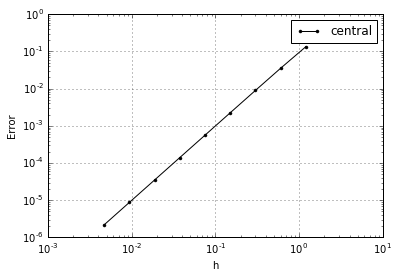

In [10]:
%pylab inline
import math

def central_diff(f, x, h):
    fxph = f(x+h)
    fxnh = f(x-h)
    return (fxph-fxnh)/(2*h)

exact = -math.sin(2.5) # for this example we know trivially what the exact solution should be

print "Exact deriviative at cos(2.5) = ", -math.sin(2.5)
print "%20s"%("Central differencing")

atol=1.0e-6
fd_errors = []; cd_errors = []; h_all = [] # we're going to store all the values for plotting
h=1.2 # an initial mesh spacing
for i in range(100):
    cd = central_diff(math.cos, 2.5, h)
    print "%10g (error=%10.2g)"%(cd, abs(cd-exact))
    if abs(cd-exact)<atol:
        break
    # store the h and the errors
    h_all.append(h); cd_errors.append(abs(cd-exact))
    h=h/2 # halve h for the next iteration

# as we expect a polynomial relationship between h and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
loglog(h_all,cd_errors,'k.-',label='central')
xlabel('h');ylabel('Error');grid(True)
pylab.legend(loc='best')

## Question 4

 1. Write a Python function that integrates a given function using the trapezoidal rule. The function should look like *trapezoid_rule(start_point, end_point, f, atol=1.0e-6)* where *start_point* and *end_point* are the bound of the integral, *f* is the function to be integrated and *atol* is the target error in the integral (approximate the error as the absolute difference between successive estimates of the integral for increasing numbers of segments). <sup>[10 marks]</sup>
 2. Use this function to evaluate the integral $\int_0^\pi \sqrt{x}\cos(x) dx$ to two decimal places only. How many subdivisions are needed to achieve this result? <sup>[10 marks]</sup>

In [11]:
import numpy as np

def trapezoid_rule(start_point, end_point, f, atol=1.0e-6, maxiter=1000):
    convergence = np.zeros(maxiter)

    for number_of_bins in range (1, maxiter):
        bin_size = float(end_point - start_point)/number_of_bins
        
        # Loop to create each trapezoid 
        for i in range(number_of_bins):
            a = start_point + (bin_size * i)
            b = a+bin_size
            
            convergence[number_of_bins] += bin_size*float(f(a)+f(b))/2.0

        if number_of_bins>1 and abs(convergence[number_of_bins]-convergence[number_of_bins-1])<atol:
            break
    return convergence[number_of_bins], number_of_bins

def f(x):
    return sqrt(x)*cos(x)

print trapezoid_rule(0.0, pi, f, 0.01)

(-0.94069360904553889, 9)


## Question 5

Consider the function:
$$f(x) = \dfrac{1}{(x − 0.3)^2 + 0.01} - \dfrac{1}{(x − 0.8)^2 + 0.04}$$.

 1. Write a general Python function that computes the root of a function using the bisection method. The function interface should look like *bisection(f, lower_bound, upper_bound, atol=1.0E-4, max_iterations=100)* where *f* is the function to whose root is sought, *lower_bound* and the *upper_bound* are two values that bracket the root, *atol* is the target absolute error in the solution and *max_iterations* is the maximum number of iterations to be executed. The function should return as a tuple the root and number of iterations required to achieve the specified tolerance. <sub>[5 marks]</sub>
 2. Write a general Python function that computes the root of a function using the Newton-Raphson method. The function interface should look like *newton(fxn, x0, atol=1.0E-4, max_iterations=100)* and return as a tuple the root and number of iterations required to achieve the specified tolerance. For this you should evaluate numerically the first derivative of $f(x)$ using finite differencing. <sub>[5 marks]</sub>
 3. Using both approaches, calculate the root of $f(x)$ and the number of iterations required in both cases. <sub>[5 marks]</sub>
 4. Give an example where the Newton-Raphson method will fail in this case and explain why. <sub>[5 marks]</sub>

Bisection used 25 evaluations
0.580017089844
Newton (num dif) used 12 evaluations
0.579999983636


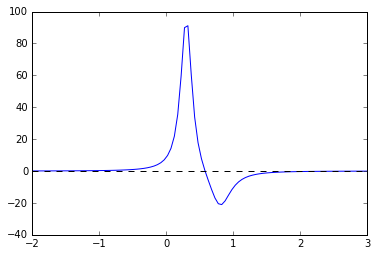

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def bisection(fct, a, b, atol=1.0E-4, nmax=100):
    n = 0
    fevals = 0
    while n <= nmax:
        c = (a+b)/2.
        if fct(c) == 0. or (b-a)/2. < atol: # one evaluation
            fevals += 1
            print 'Bisection used', fevals, 'evaluations'
            return c
        n += 1
        if np.sign(fct(c)) == np.sign(fct(a)): # two evaluations
            a = c
        else:
            b = c
        fevals += 2
    raise RuntimeError('no root found within [a,b]')

def newton_numdif(fct, x0, dx=1.0E-2, atol=1.0E-4):
    x = [x0]
    fevals = 0
    while 1:
        dfdx = (fct(x[-1]+dx)-fct(x[-1]))/(dx) # two evaluations
        if numpy.isclose(dfdx, 0):
            print "Newton-Raphson failing: zero gradient"
            return x[-1]
        x.append(x[-1] - fct(x[-1])/dfdx) #  one evaluation
        fevals += 3
        if abs(x[-1]-x[-2]) < atol:
            print 'Newton (num dif) used', fevals, 'evaluations'
            return x[-1]

def f(x):
    return 1./((x-0.3)**2+0.01) - 1./((x-0.8)**2+0.04)

x0=0.5
print bisection(f, x0, 2*x0)
print newton_numdif(f, x0)

xx = np.linspace(-2,3,100)
plt.plot(xx,f(xx))
plt.plot(xx,np.linspace(0,0,100),'k--')
plt.show()

In [16]:
# 5.4
# Any x outside the bounds defined by the maximum and minimum values of f(x)
# results in Newton-Raphsons method to diverge and ultimately fail 
# as the gradient goes to zero. Also fails where df/dx=0.
print newton_numdif(f, 1.0)



Newton-Raphson failing: zero gradient
155.183712525
